In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import warnings
import os
import numpy as np
import shutil

warnings.filterwarnings('ignore')

2025-11-04 08:00:39.418093: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762243239.771402      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762243239.865587      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
data_dir = "/kaggle/input/plant-village/PlantVillage"
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [5]:
all_classes = os.listdir(data_dir)

all_classes
# I need to keep only tomato classes, 

['Pepper__bell___Bacterial_spot',
 'Potato___healthy',
 'Tomato_Leaf_Mold',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Bacterial_spot',
 'Tomato_Septoria_leaf_spot',
 'Tomato_healthy',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Early_blight',
 'Tomato__Target_Spot',
 'Pepper__bell___healthy',
 'Potato___Late_blight',
 'Tomato_Late_blight',
 'Potato___Early_blight',
 'Tomato__Tomato_mosaic_virus']

In [6]:
input_dir = "/kaggle/input/plant-village/PlantVillage"
output_dir = "/kaggle/working/tomato_dataset"

keyword_to_keep = 'Tomato'

if os.path.exists(output_dir):
    print(f"Deleting existing output directory: {output_dir}")
    shutil.rmtree(output_dir)

os.makedirs(output_dir, exist_ok=True)
print(f"Crated a new working directory to store tomato disease: {output_dir}")

tomato_class = []

for class_name in all_classes:
    source_path = os.path.join(input_dir, class_name)

    if os.path.isdir(source_path) and keyword_to_keep in class_name:
        destination_path = os.path.join(output_dir, class_name)

        print(f"Copying and keeping: **{class_name}**")
        shutil.copytree(source_path, destination_path)
        tomato_class.append(class_name)

    elif os.path.isdir(source_path):
        print(f"Skipping and Deleting: **{class_name}**")

print("-" * 50)
print(f"filtering of tomato disease data is now completed")
print(tomato_class)

Crated a new working directory to store tomato disease: /kaggle/working/tomato_dataset
Skipping and Deleting: **Pepper__bell___Bacterial_spot**
Skipping and Deleting: **Potato___healthy**
Copying and keeping: **Tomato_Leaf_Mold**
Copying and keeping: **Tomato__Tomato_YellowLeaf__Curl_Virus**
Copying and keeping: **Tomato_Bacterial_spot**
Copying and keeping: **Tomato_Septoria_leaf_spot**
Copying and keeping: **Tomato_healthy**
Copying and keeping: **Tomato_Spider_mites_Two_spotted_spider_mite**
Copying and keeping: **Tomato_Early_blight**
Copying and keeping: **Tomato__Target_Spot**
Skipping and Deleting: **Pepper__bell___healthy**
Skipping and Deleting: **Potato___Late_blight**
Copying and keeping: **Tomato_Late_blight**
Skipping and Deleting: **Potato___Early_blight**
Copying and keeping: **Tomato__Tomato_mosaic_virus**
--------------------------------------------------
filtering of tomato disease data is now completed
['Tomato_Leaf_Mold', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'To

In [7]:
dataset = tf.keras.utils.image_dataset_from_directory(
    output_dir, 
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 16011 files belonging to 10 classes.


2025-11-04 08:03:09.224127: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [9]:
len(dataset)

501

In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

# tensor of first image

tf.Tensor(
[[[138. 130. 127.]
  [156. 148. 145.]
  [158. 150. 147.]
  ...
  [190. 189. 185.]
  [191. 190. 186.]
  [192. 191. 187.]]

 [[161. 153. 150.]
  [145. 137. 134.]
  [122. 114. 111.]
  ...
  [188. 187. 183.]
  [188. 187. 183.]
  [189. 188. 184.]]

 [[145. 137. 134.]
  [134. 126. 123.]
  [159. 151. 148.]
  ...
  [186. 185. 181.]
  [185. 184. 180.]
  [185. 184. 180.]]

 ...

 [[176. 168. 166.]
  [165. 157. 155.]
  [179. 171. 169.]
  ...
  [209. 213. 216.]
  [208. 212. 215.]
  [207. 211. 214.]]

 [[169. 161. 159.]
  [186. 178. 176.]
  [179. 171. 169.]
  ...
  [209. 213. 216.]
  [208. 212. 215.]
  [208. 212. 215.]]

 [[178. 170. 168.]
  [186. 178. 176.]
  [177. 169. 167.]
  ...
  [208. 212. 215.]
  [208. 212. 215.]
  [208. 212. 215.]]], shape=(256, 256, 3), dtype=float32)


In [11]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

# numpy values of first image

[[[148. 131. 124.]
  [149. 132. 125.]
  [128. 111. 104.]
  ...
  [146. 125. 120.]
  [132. 111. 106.]
  [132. 111. 106.]]

 [[149. 132. 125.]
  [141. 124. 117.]
  [142. 125. 118.]
  ...
  [119.  98.  93.]
  [140. 119. 114.]
  [149. 128. 123.]]

 [[147. 130. 123.]
  [128. 111. 104.]
  [140. 123. 116.]
  ...
  [128. 107. 102.]
  [147. 126. 121.]
  [133. 112. 107.]]

 ...

 [[182. 171. 167.]
  [182. 171. 167.]
  [184. 173. 169.]
  ...
  [209. 204. 198.]
  [215. 210. 204.]
  [223. 218. 212.]]

 [[183. 172. 168.]
  [175. 164. 160.]
  [171. 160. 156.]
  ...
  [212. 207. 201.]
  [213. 208. 202.]
  [216. 211. 205.]]

 [[170. 159. 155.]
  [163. 152. 148.]
  [162. 151. 147.]
  ...
  [211. 206. 200.]
  [207. 202. 196.]
  [205. 200. 194.]]]


In [12]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

# shape of the image

(256, 256, 3)


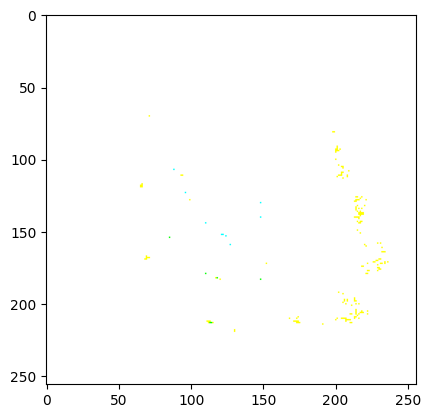

In [13]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[3].numpy())

# visualizing the image

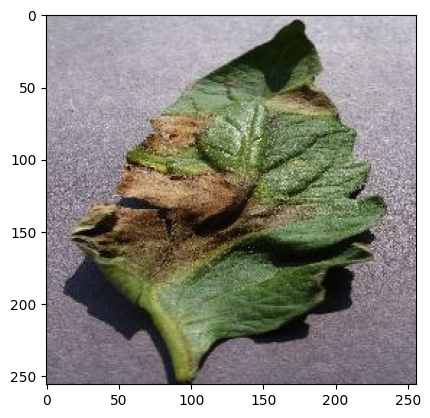

In [14]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

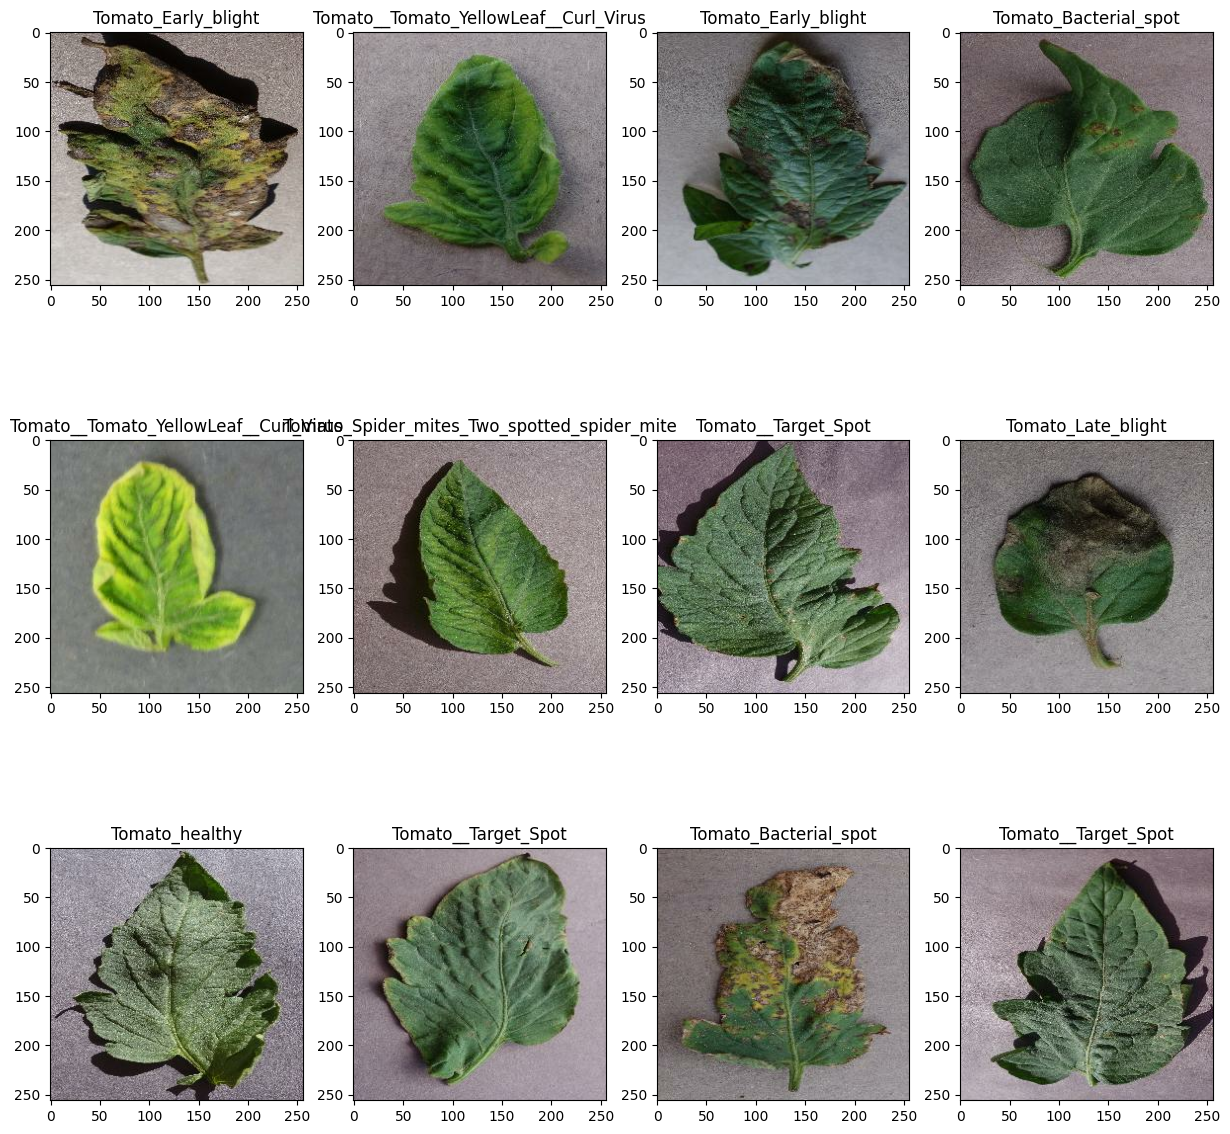

In [15]:
plt.figure(figsize=(15, 15))

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4, i+ 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])

# visualizing the image


### **80% --> Trianing**<br>
### **20% --> 10%-validation, 10%-testing**


In [16]:
len(dataset)

501

### Train Test and Validation Split

In [17]:
from sklearn.model_selection import train_test_split

train_size = 0.8
len(dataset)*train_size

400.8

In [18]:
train_ds = dataset.take(400)
len(train_ds)

400

In [19]:
test_ds = dataset.skip(400)
len(test_ds)

101

In [20]:
val_size = 0.1
len(dataset)*val_size

50.1

In [21]:
val_ds = test_ds.take(50)
len(val_ds)

50

In [22]:
test_ds = test_ds.skip(50)
len(test_ds)

51

In [23]:
# lets apply the above technique inside a python function to make it work like what we want

def get_dataset_partitions(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [24]:
train_ds, val_ds, test_ds = get_dataset_partitions(dataset)

In [25]:
len(train_ds)

400

In [26]:
len(test_ds)

51

In [27]:
len(val_ds)

50

#### We got the training, testing and validation data as what we planned 

In [28]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

### Scaling the Dataset

In [29]:
resize_and_rescale = tf.keras.Sequential([
    layers.Rescaling(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

print("Preprocessing Sequential model created successfully")

Preprocessing Sequential model created successfully


### Data Augmentation

In [ ]:
data_augmenation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

### Model Building

In [31]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    
    resize_and_rescale,
    data_augmenation,
    
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,202 (719.54 KB)

 Trainable params: 184,202 (719.54 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

### Training on the dataset

In [ ]:
EPOCHS = 10

history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 978s 2s/step - accuracy: 0.3471 - loss: 2.1299 - val_accuracy: 0.4944 - val_loss: 1.4602
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 908s 2s/step - accuracy: 0.6649 - loss: 0.9597 - val_accuracy: 0.6237 - val_loss: 1.1131
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 900s 2s/step - accuracy: 0.7621 - loss: 0.6738 - val_accuracy: 0.7350 - val_loss: 0.7762
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 943s 2s/step - accuracy: 0.7841 - loss: 0.6190 - val_accuracy: 0.7844 - val_loss: 0.6214
Epoch 5/10
249/400 ━━━━━━━━━━━━━━━━━━━━ 5:32 2s/step - accuracy: 0.8163 - loss: 0.5261

In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
history.param

In [ ]:
history.history.keys()

In [ ]:
acc = history.history['accuracy']
cal_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

### Plotting training and validation accuracy and Loss 

In [ ]:
plt.figure(figsize=(10, 18))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Trianing and Validation Accuracy')
plt.show()


plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc='upper right')
plt.title('Trianing and Validation Accuracy')
plt.show()

In [ ]:
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy.astype('uint8'))
    first_label = labels_batch[0]

    print("first image to predict")
    plt.imshow(first_image)
    print("Actual label:", class_names[first_label])


    batch_prediction = model.predict(images_batch)
    print("predicted Labes:", class_names[np.argmax(batch_prediction[0])])


### Prediction function

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(8, 8))
for images, labels, in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8")

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_calss = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}. \n Confidence: {confidence}%")

        plt.axis('off')

In [ ]:
model_version = 1
model.save(f"../models/{model_vesion}")